# Dataset distribution
In this notebook, we study the effect of our metric chi square and absolute amplitude limitations.

# 0. Import

In [1]:
import numpy as np
import pandas as pd
from statistics import mean
from scipy.stats import chi2, chi, gaussian_kde

from helpers.data_generation.file_management import read_hdf5
import helpers.data_generation.error_generation_chi2 as reschigen
import helpers.data_generation.error_generation as resgen

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Build the four classes 
size = 6000; ratio = 0.75;
percent = np.array([0.005, 0.015, 0.005])
res = resgen.Residual()
res.build(size, ratio = ratio, per_error = percent)

print('Data Generation Finished')
str_ID =  "S"+str(size)+"R"+str(int(ratio*100))
[final_array, metadata] = read_hdf5(str_ID)


# Build the four classes 
size = 6000; ratio = 0.75;
percent = np.array([0.005, 0.015, 0.005])
res_chi = reschigen.Residual()
res_chi.build(size, ratio = ratio, per_error = percent)

print('Data Generation Finished')
str_ID =  "S"+str(size)+"R"+str(int(ratio*100))
[final_array_chi, metadata_chi] = read_hdf5(str_ID)

Data Generation Finished
Data Generation Finished


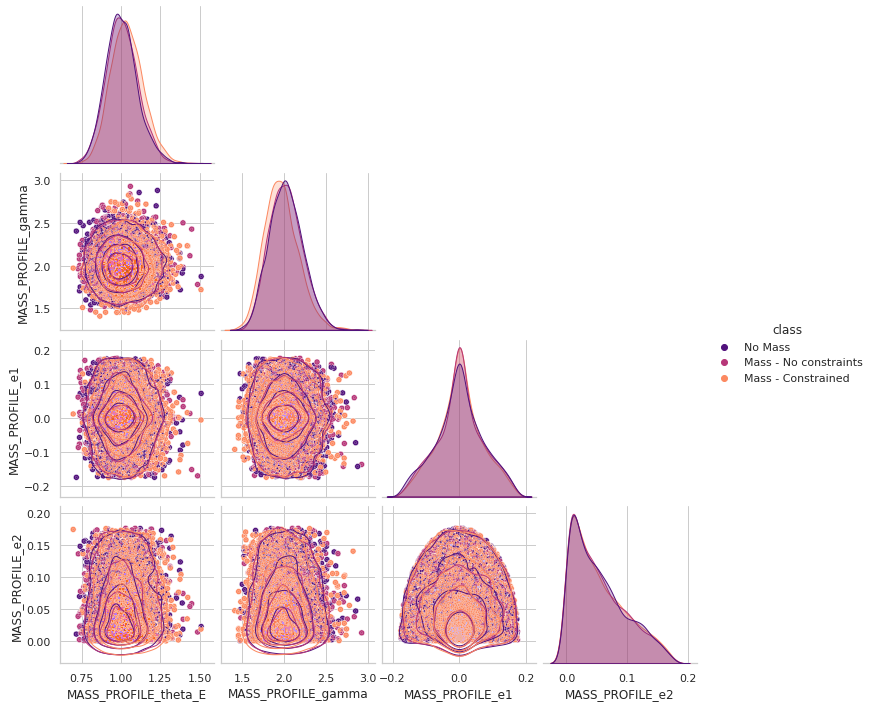

In [22]:
meta_err = res.metadata_error.copy(deep=True)
meta_err_chi = res_chi.metadata_error.copy(deep=True)

meta_err_chi = res_chi.metadata_error.copy(deep=True)

meta_err_chi = meta_err_chi.drop(meta_err_chi.loc[[col == [0,0] for col in meta_err_chi['class']],'class'].index)
meta_err_chi = meta_err_chi.drop(meta_err_chi.loc[[col == [0,1] for col in meta_err_chi['class']],'class'].index)
meta_err_chi.loc[[col == [1,1] for col in meta_err_chi['class']], 'class'] = 'Mass - Constrained'
meta_err_chi.loc[[col == [1,0] for col in meta_err_chi['class']], 'class'] = 'Mass - Constrained'


meta_err.loc[[col == [0,0] for col in meta_err['class']], 'class'] = 'No Mass'
meta_err.loc[[col == [1,0] for col in meta_err['class']], 'class'] = 'Mass - No constraints'
meta_err.loc[[col == [0,1] for col in meta_err['class']], 'class'] = 'No Mass'
meta_err.loc[[col == [1,1] for col in meta_err['class']], 'class'] = 'Mass - No constraints'

meta_err = pd.concat([meta_err, meta_err_chi])
cols = meta_err.columns[2:6].tolist()
cols.append('class')
g = sns.pairplot(meta_err[cols], diag_kind="kde", corner = True, hue="class", palette = "magma")
g.map_lower(sns.scatterplot, s=5)
g.map_lower(sns.histplot, bins=300, pthresh=.1)
g.map_lower(sns.kdeplot, levels=5, color="w", linewidths=1)
g.savefig('figures/datanalysis/statMass.jpeg')

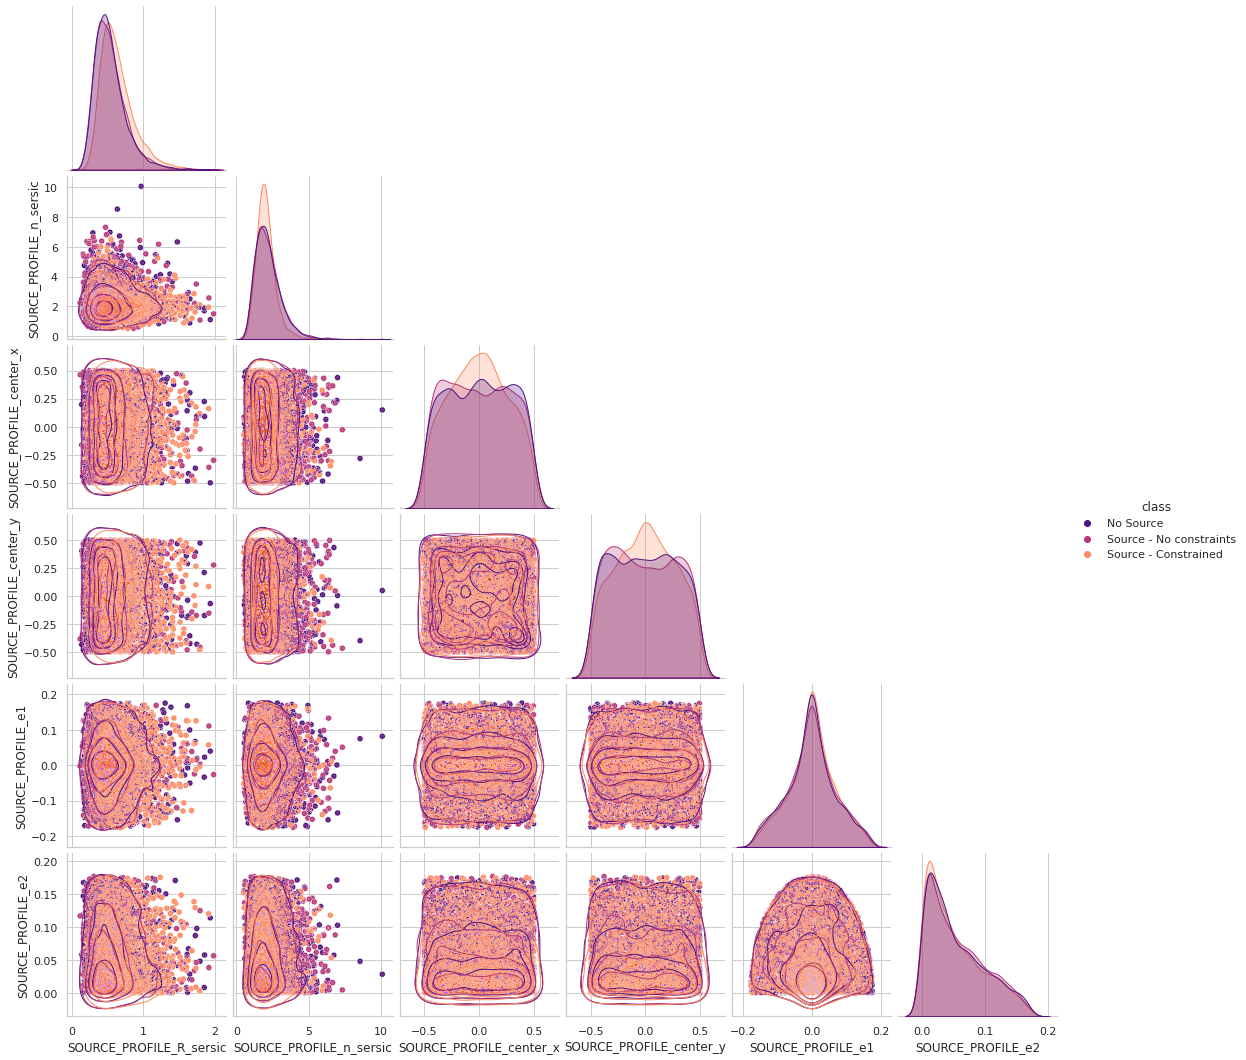

In [25]:
meta_err = res.metadata_error.copy(deep=True)
meta_err_chi = res_chi.metadata_error.copy(deep=True)

meta_err_chi = res_chi.metadata_error.copy(deep=True)

meta_err_chi = meta_err_chi.drop(meta_err_chi.loc[[col == [0,0] for col in meta_err_chi['class']],'class'].index)
meta_err_chi = meta_err_chi.drop(meta_err_chi.loc[[col == [1,0] for col in meta_err_chi['class']],'class'].index)
meta_err_chi.loc[[col == [1,1] for col in meta_err_chi['class']], 'class'] = 'Source - Constrained'
meta_err_chi.loc[[col == [0,1] for col in meta_err_chi['class']], 'class'] = 'Source - Constrained'


meta_err.loc[[col == [0,0] for col in meta_err['class']], 'class'] = 'No Source'
meta_err.loc[[col == [1,0] for col in meta_err['class']], 'class'] = 'No Source'
meta_err.loc[[col == [0,1] for col in meta_err['class']], 'class'] = 'Source - No constraints'
meta_err.loc[[col == [1,1] for col in meta_err['class']], 'class'] = 'Source - No constraints'

meta_err = pd.concat([meta_err, meta_err_chi])
meta_err= meta_err.drop(columns = ['percent'])
cols = meta_err.columns[7:].tolist()
g = sns.pairplot(meta_err[cols], diag_kind="kde", corner = True, hue="class", palette = "magma")
g.map_lower(sns.scatterplot, s=5)
g.map_lower(sns.histplot, bins=300, pthresh=.1)
g.map_lower(sns.kdeplot, levels=5, color="w", linewidths=1)
g.savefig('figures/datanalysis/statSource.jpeg')